# Style Transfer

Mit Style Transfer kannst Du den Zeichenstil eines Bildes auf ein Foto oder ein anderes Bild übertragen.
Dazu wählst du aus einer verschiedenen Bildern zuerst das Bild aus, welches Du ändern möchtest (Content Image), dann das von dem Du den Stil kopieren willst (Style Image). Wie der Style Transfer genau funktioniert, können wir uns bei den nächsten Treffen hier im Lab anschauen.

Mit dem ersten Code Block laden wir einige Python Module, Funktionen und die KI - in unserem Fall ein sogenanntes Neuronales Netz.

In [1]:
from IPython import display
import torch
import glob
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim

from PIL import Image

from source.util import image_loader, imshow, unload, run_style_transfer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn = models.vgg19(pretrained=True).features.to(device).eval()
plt.ion()

Mit dem nächsten Block kannst Du dir alle Bilder anzeigen lassen, die wir für heute ausgewählt haben.

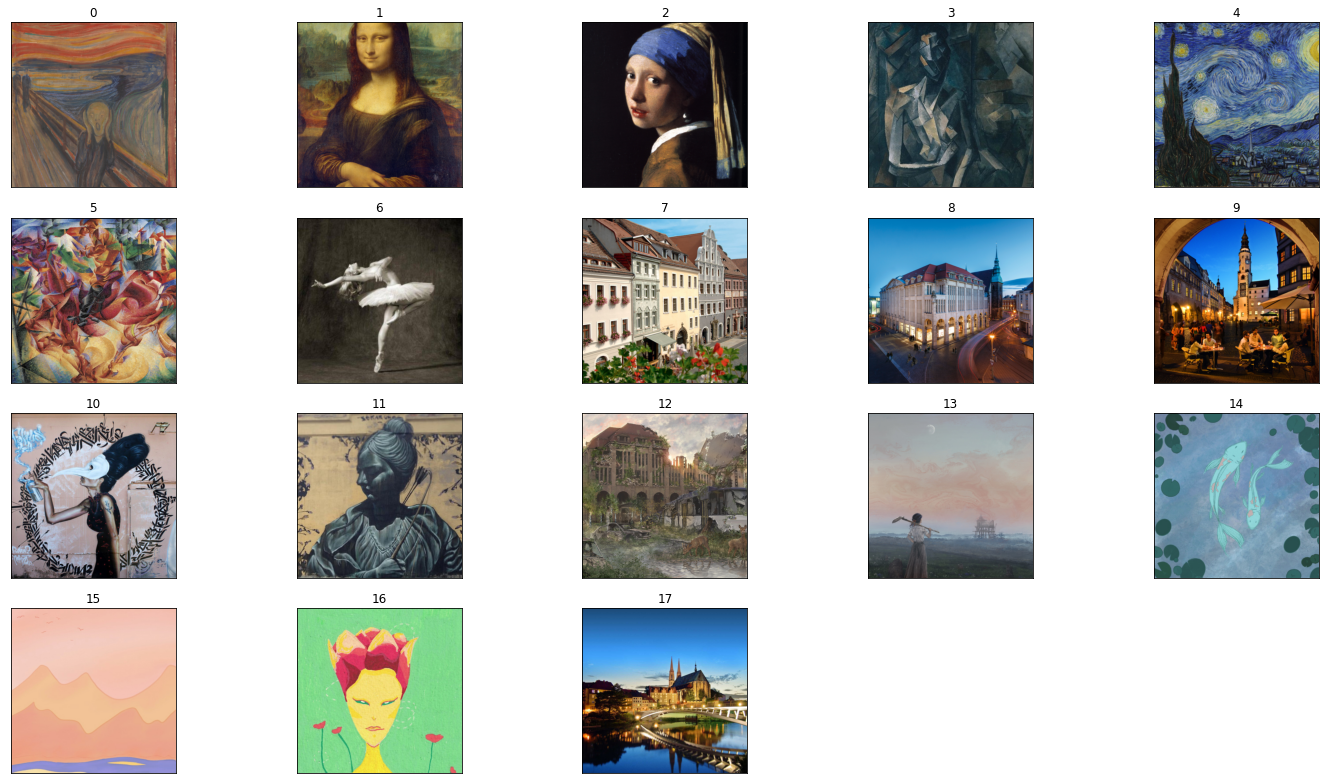

In [6]:
images = []
for img_path in sorted(glob.glob('./images/*.*')):
    images.append(image_loader(img_path))
    
plt.figure(figsize=(20,11))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(unload(image))
    plt.xticks([])
    plt.yticks([])
    plt.title(i)
plt.tight_layout()

Bild (0): [Der Schrei](https://de.wikipedia.org/wiki/Der_Schrei) - Edvard Munch, 1893

Bild (1): [Mona Lisa](https://artsandculture.google.com/asset/portrait-of-lisa-gherardini-wife-of-francesco-del-giocondo-known-as-monna-lisa-la-gioconda-or-mona-lisa-1503-1519-leonardo-di-ser-piero-da-vinci-dit-l%C3%A9onard-de-vinci-1452-1519-paris-mus%C3%A9e-du-louvre/uQGZ28lYUJ3OGw) - Leonardo da Vinci, 1503–1506

Bild (2): [Das Mädchen mit dem Perlenohrgehänge](https://artsandculture.google.com/asset/girl-with-a-pearl-earring-johannes-vermeer/3QFHLJgXCmQm2Q) - Jan Vermeer, 1665

Bild (3): [Figure dans un Fauteuil](https://en.wikipedia.org/wiki/File:Pablo_Picasso,_1909-10,_Figure_dans_un_Fauteuil_%28Seated_Nude,_Femme_nue_assise%29,_oil_on_canvas,_92.1_x_73_cm,_Tate_Modern,_London.jpg) - Pablo Picasso, 1909-1910

Bild (4): [Sternennacht](https://artsandculture.google.com/asset/the-starry-night-vincent-van-gogh/bgEuwDxel93-Pg) - Vincent van Gogh, 1889 

Bild (5): [Elasticità](https://artsandculture.google.com/asset/elasticit%C3%A0-umberto-boccioni/vgFuugdx8YZ3GQ) - Umberto Boccioni, 1912

Bild (6), Urheber unbekannt, [Quelle](https://pytorch.org/tutorials/_static/img/neural-style/dancing.jpg)

Alle Fotos aus Görlitz (7 - 9):
[Europastadt GörlitzZgorzelec GmbH](https://www.dropbox.com/sh/twt3amotv9tusml/AAD1DIF_UzT7NEaPJPKSNgzZa?dl=0)

Alle anderen Kunstwerke könnt ihr entweder in Görlitz sehen oder wurden von Künstlern aus der Stadt gezeichnet:

Grafittis (10, 11) von [Sokar Uno](https://urban-nation.com/artist/sokar-uno/), @sokaruno bei Instagram

Bilder (12, 13) von [Sarah Buchholz](https://www.artstation.com/papilio), @papilionism bei Instagram

Bilder (14 - 16) von [Rosanna Amberg](https://linktr.ee/rosie.amber), @rosie.amberg bei Instagram


Im nächsten Code Block wählt ihr jetzt zuerst ein Bild aus, dessen Stil ihr kopieren wollt (```style_img```). Am besten eignen sich als ```style_img``` eher abstrakte Bilder mit Formen und Strukturen - z.B. "Sternennacht" von van Gogh. Probiert trotzdem gerne mit allen Bildern herum. Auf das ```content_img``` wird der Zeichenstil dann übertragen.

In [7]:
style_img = images[4]
content_img = images[17]

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

Hier bereiten wir jetzt den nächsten Schritt vor. Wir können mit dem Style Transfer entweder so starten, dass wir den Stil auf das ```content_img``` kopieren - so nehmen wir sehr viel von der originalen Struktur des ``` content_img``` mit.

Wir können aber auch von einem komplett random Pixelbrei aus starten. Dann zeichnet unser Neuronales Netz ein ganz neues Bild aus ```style_img``` und ```content_img```. Bei manchen Kombinationen von oben sieht das Ergebnis besser aus, wenn Du damit als ```input_img``` startest. Probiere gerne beides aus.

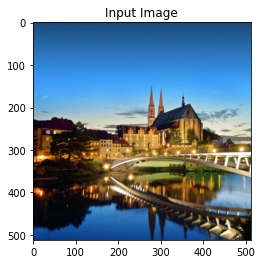

In [8]:
input_img = content_img.clone()
# Wenn stattdessen von Rauschen aus gestartet werden soll, kommentiere die obere Zeile mit # am Anfang aus 
# und lösche # am Anfang der nächsten Zeile
#input_img = torch.randn(content_img.data.size(), device=device)


plt.figure()
imshow(input_img, title='Input Image')


Und jetzt endlich zum eigentlichen Style Transfer. Wenn das ```input_img``` random generiert wurde und nicht gleich dem ```content_img``` ist, musst du ```content_weight```anpassen. Setze den Wert von 1 auf einen Wert zwischen 10 und 100 und probiere gerne häufiger, wie sich das Ergebnis ändert.

Manchmal kann es auch helfen ```num_steps``` etwas hoch zu setzen. Ändere dafür einfach den Wert von 500 auf einen anderen. Dann dauert die Erstellung Deines Kunstwerkes aber etwas länger.



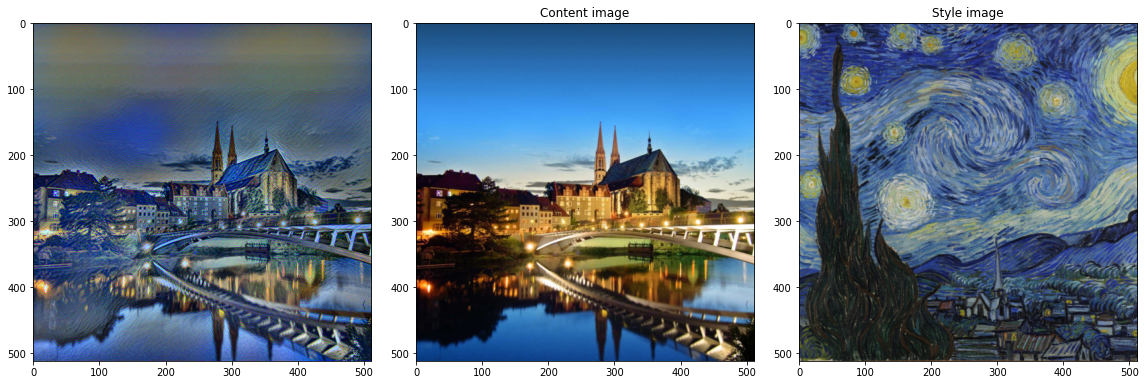

run [520]:
Style Loss : 10.202611 Content Loss: 44.381275



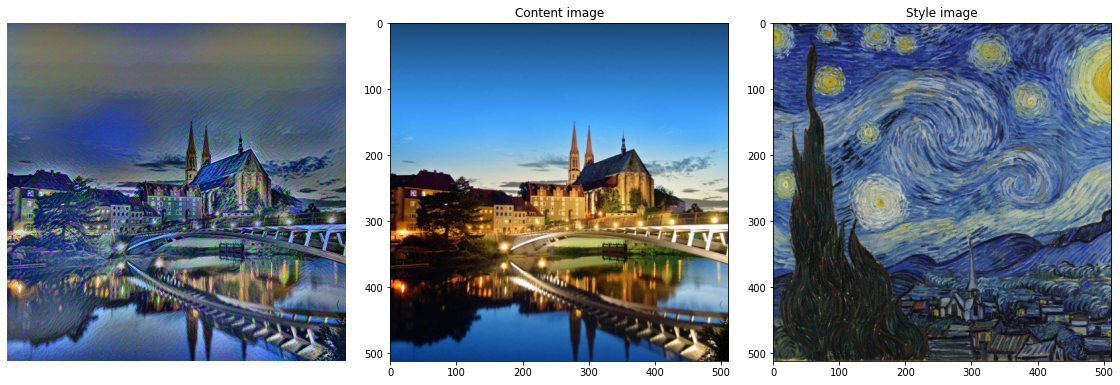

In [9]:
output = run_style_transfer(cnn, content_img, style_img, input_img, content_weight=10, 
                            style_weight=10e4, num_steps=500)


plt.ioff()
plt.axis('off')
plt.show()


Und mit dem letzten Block kannst Du dein Bild speichern. Du findest es dann im Ordner 'results'. Vergiss nicht deinem Kunstwerk noch einen eindeutigen Titel zu geben (ersetze dafür title in der letzten Zeile).

In [28]:
im = unload(output.clone().detach().cpu().squeeze(0))
!mkdir -p results
im.save("./results/lisa-of-the-north.jpg")